- Erosion : 침식, 잡음 제거
- 객체의 경계를 깎아내어 물체의 크기는 축소시키고, 배경은 확장시키는 방법
- 잡음이나 불필요한 작은 물체를 제거, 서로 닿은 물체를 분리
- Dilation : 팽창, 영상을 뚜렷하게 만드는 기법
- 배경을 축소시키고 물체의 크기를 확장시키는 방법

In [1]:
import cv2
import numpy as np
img = cv2.imread("d:/data/images/penguin.png")

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
out = np.zeros((height + 2, width + 2), dtype=np.uint8) #제로 패딩
out[1:1 + height, 1:1+width] = gray.copy()
erode = np.zeros_like(gray) # 침식 연산을 위한 빈 영상
dilate = np.zeros_like(gray) # 팽창 연산을 위한 빈 영상

# 직접 계산하는 방식
for i in range(height):
    for j in range(width):
        temp = out[i:i+3, j:j+3]
        erode[i][j] = np.min(temp) #침식 연산(범위의 최소값)
        dilate[i][j] = np.max(temp) #팽창 연산(범위의 최대값)

# 함수를 사용하는 방식
array = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
erosion = cv2.erode(gray, array)
dilation = cv2.dilate(gray, array)
#침식 연산은 선이 굻고 어둡게, 팽창 연산은 선이 가늘고 밝게 출력됨

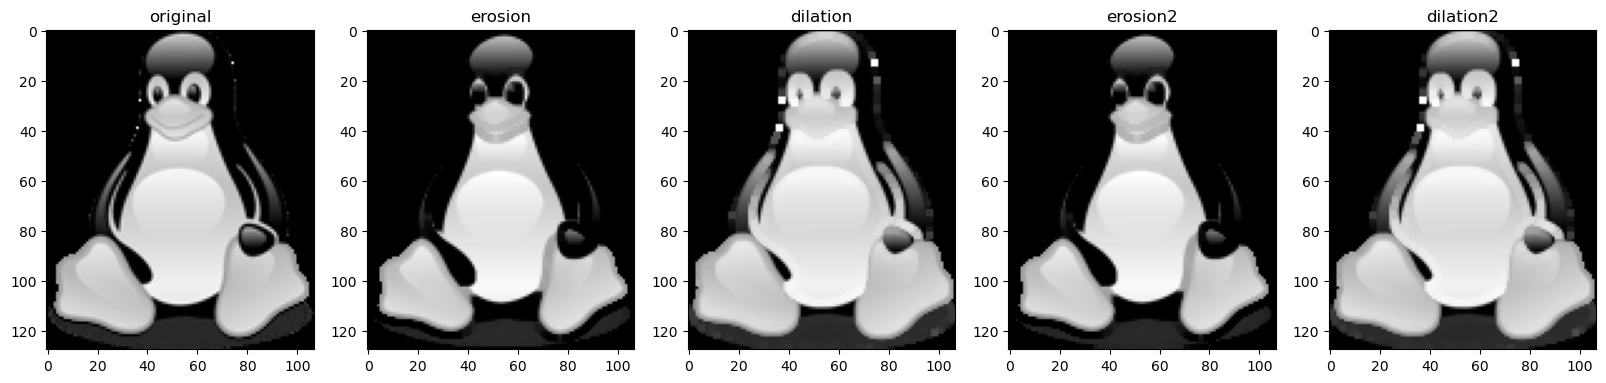

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(gray, cmap='gray') # 원본 이미지
plt.title('original')
plt.subplot(152)
plt.imshow(erode, cmap='gray') # 침식 연산(반복문 사용)
plt.title('erosion')
plt.subplot(153)
plt.imshow(dilate, cmap='gray') # 팽창 연산(반복문 사용)
plt.title('dilation')
plt.subplot(154)
plt.imshow(erosion, cmap='gray') # 침식 연산(함수 사용)
plt.title('erosion2')
plt.subplot(155)
plt.imshow(dilation, cmap='gray') # 팽창 연산(함수 사용)
plt.title('dilation2')
plt.show()